<a href="https://colab.research.google.com/github/FajarRamadhanBBX/FanTaxi/blob/main/FanTaxi-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Permasalahan:

Argo taxi konvensional yang tidak bisa diprediksi totalnya membuat pengguna lebih memilih taxi online yang memberi tahu harga sewa taxi sedari awal. Pembuatan model untuk melakukan prediksi harga argo dapat menjadi solusi bagi Taxi konvensional

# Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Persiapan

## Unduh data

In [2]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nani123456789/taxi-trip-fare-prediction

! unzip -q /content/taxi-trip-fare-prediction.zip -d /content/data

Dataset URL: https://www.kaggle.com/datasets/nani123456789/taxi-trip-fare-prediction
License(s): CC0-1.0
 69% 2.00M/2.88M [00:00<00:00, 2.87MB/s]
100% 2.88M/2.88M [00:00<00:00, 3.36MB/s]


## Memuat data

In [3]:
df_train = pd.read_csv('/content/data/taxi_fare/train.csv')

## Menghilangkan outliers

In [4]:
df_train.drop(df_train[df_train['distance_traveled']>800].index, inplace=True)

# EDA

## Hubungan jarak tempuh dengan waktu tempuh

<Axes: xlabel='trip_duration', ylabel='distance_traveled'>

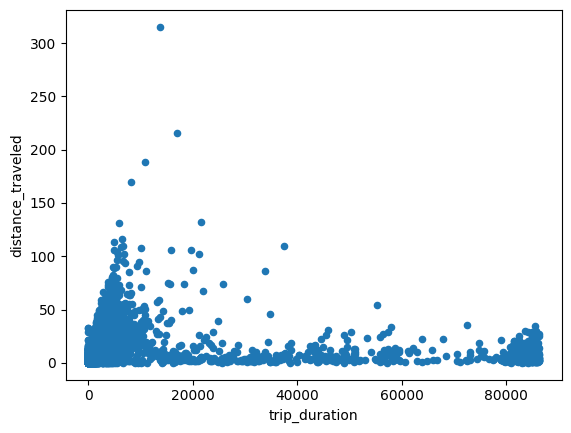

In [5]:
df_train.plot(y='distance_traveled', x='trip_duration', kind='scatter')

## Hubungan harga argo dengan waktu tempuh

<Axes: xlabel='trip_duration', ylabel='fare'>

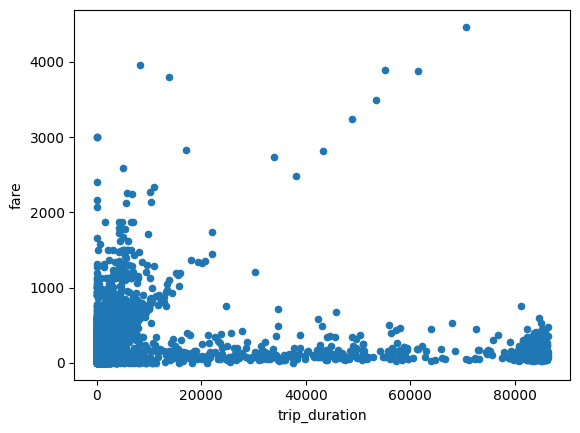

In [6]:
df_train.plot(y='fare', x='trip_duration', kind='scatter')

## Hubungan harga argo dengan jarak tempuh

<Axes: xlabel='distance_traveled', ylabel='fare'>

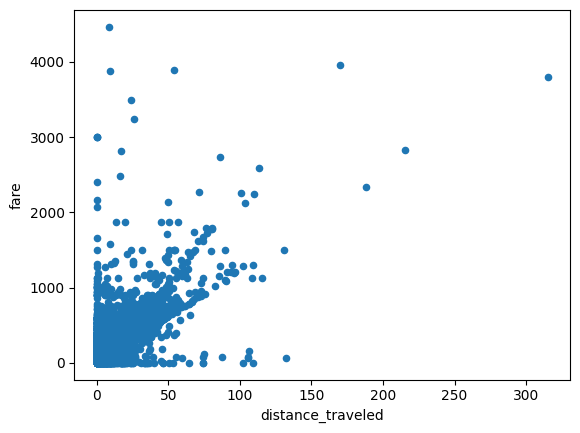

In [7]:
df_train.plot(y='fare', x='distance_traveled', kind='scatter')

# Preprocessing data

Hanya 3 fitur yang digunakan. Hal ini dikarenakan fitur lainnya tidak wajib ada ketika menggunakan Taxi dalam dunia nyata serta besarannya tidak dapat diperkirakan

In [8]:
fitur = ['trip_duration','distance_traveled','num_of_passengers']
label = ['fare']

fitur_train = df_train[fitur]
label_train = df_train[label]

# Pembagian data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(fitur_train, label_train, test_size=0.2, random_state=5)

# Membuat model

In [19]:
model_xgb = xgb.XGBRegressor(n_estimators=100)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE: {mae}")

MAE: 8.325965182886684


# Menyimpan model

In [20]:
model_xgb.save_model('model.json')